# Primer Examen 15%

A) Cargando el archivo JSON: 
* https://github.com/restrepo/anomaly/raw/main/solutions.json.gz

en Pandas

1) Adicione una columna nueva `'smax'` con el valor máximo en valor absoluto de la lista de enteros de la correspondiente entrada en la columna '`solution`'

2) Adicione dos columnas nuevas: `'sum_s'` (`sum_s³`) con el resultado de la suma (al cubo) de todos los números de la lista de enteros de la correspondiente entrada en la columna '`solution`'

3) Usando como semilla el número de su cédula, genere un número entero de forma aleatoria entre 0 y 390073. Seleccione la fila con el índice correspondiente a ese número entero y construya un polinomio con esos coeficientes. Encuentre las raices reales de ese polinomio y realice el correspondiente gráfico incluyendo: 
* el polinomio generado, sus raices (como puntos en el gráfico) y la derivada del polinomio. 
* Optimize el rango de valores en el eje $x$ y en el eje $y$ del gráfico, de manera que el polinomio y sus raices se visualicen de la mejor forma posible. (Sugerencia → use: `plt.ylim(ymin,ymax)` ). 
* Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo


In [9]:
import pandas as pd
import numpy as np

In [10]:
df= pd.read_json('https://github.com/restrepo/anomaly/raw/main/solutions.json.gz')
df

,l,k,solution,gcd,n
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11
...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8


**A.1**

In [17]:

df['smax'] = df.apply(lambda t: max(t['solution']), axis='columns')
df

,l,k,solution,gcd,n,smax
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,5
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,7
...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,31
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31


**A.2**

In [18]:
df['sum_s'] = df.apply(lambda x: sum(x['solution']), axis='columns')
df

,l,k,solution,gcd,n,smax,sum_s
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6,0
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4,0
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,5,0
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7,0
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,7,0
...,...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32,0
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28,0
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,31,0
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31,0


In [19]:
df['sum_s^3'] = df.apply(lambda x: (sum(x['solution']))**3, axis='columns')
df

,l,k,solution,gcd,n,smax,sum_s,sum_s^3
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6,0,0
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4,0,0
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,5,0,0
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7,0,0
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,7,0,0
...,...,...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32,0,0
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28,0,0
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,31,0,0
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31,0,0


**A.3**

In [59]:
import random
from scipy import optimize

In [27]:
np.random.seed(1001479482)
a=random.randint(0,390073)

In [28]:
dff=pd.DataFrame(df.loc[a])
dff

,306886
l,"[-4, -1, 1, -2]"
k,"[-1, -4, 1, -1, 3]"
solution,"[4, 4, 4, 5, 9, -11, -16, 17, -19, -25, 28]"
gcd,6
n,11
smax,28
sum_s,0
sum_s^3,0


In [31]:
poli= np.poly1d([4, 4, 4, 5, 9, -11, -16, 17, -19, -25, 28])
print(poli)

   10     9     8     7     6      5      4      3      2
4 x  + 4 x + 4 x + 5 x + 9 x - 11 x - 16 x + 17 x - 19 x - 25 x + 28


In [45]:
coeficientes=[4, 4, 4, 5, 9, -11, -16, 17, -19, -25, 28]
r = np.roots(coeficientes)
realeess=[]
print('todas las raíces son:',r)
for i in range(len(r)):
    if np.isreal(r[i]):
        impr=np.real(r[i])
        realeess.append(impr)

print('las raices reales son:',realeess)


todas las raíces son: [-1.09647718+1.13341058j -1.09647718-1.13341058j -1.15299706+0.25545132j
 -1.15299706-0.25545132j  0.31265733+1.36914116j  0.31265733-1.36914116j
  0.54509242+1.00449914j  0.54509242-1.00449914j  1.        +0.j
  0.78344899+0.j        ]
las raices reales son: [1.0000000000000018, 0.7834489889134154]


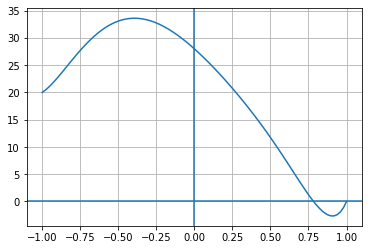

In [50]:
import matplotlib.pyplot as plt

x=np.linspace(-1,1,num=100)
fx=[]

for i in range(len(x)):
  fx.append(4*x[i]**10 + 4*x[i]**9 + 4*x[i]**8 + 5*x[i]**7 + 9*x[i]**6 - 11*x[i]**5 - 16*x[i]**4 + 17*x[i]**3 - 19*x[i]**2 - 25*x[i] + 28)

plt.plot(x,fx)
plt.grid()
plt.axvline()
plt.axhline()
plt.show()

B)

I) Usando como semilla el número de su cédula, genere de forma aletoria un número entero entre 1 y 5

II) De acuerdo al entero obtenido, escoja una de las siguientes cinco funciones 
1. $$x\operatorname{e}^x=p\,, $$
2. $$\frac{\sin x}{x}=+p\,,$$
3. $$\frac{\sin x}{x}=-p\,,$$
4. $$\frac{\cos x}{x}=+p\,,$$
5. $$\frac{\cos x}{x}=-p\,,$$

III) Genere un número aleatorio entre 0 y 1 y asignelo al valor de $p$

IV) Encuentre la solución a la ecuación trascendental para el intervalo $x$ entre -10 y 10 y gráfique la correspondiente función trascendental y las correspondientes soluciones. Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo.

A modo de nota curiosa: estas ecuaciones trascendentales están asociadas a soluciones de la ecuación de Schödinger en mecánica cuántica: https://doi.org/10.1080/14786435.2015.1081425

In [64]:
np.random.seed(1001479482)
a=random.randint(1,5)
a

5

In [56]:
p=random.uniform(0, 1)
p

0.3694317456735864

In [76]:
def function(x):
    return (np.cos(x)/x) + p

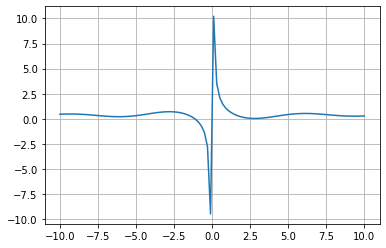

In [77]:
X = np.linspace(-10,10,100)
Y = function(X)
plt.grid()
plt.plot(X,Y)

In [68]:
def g(x):
    return x-function(x)

In [81]:
#optimize.fixed_point(g, x0=10)
root1=optimize.fixed_point(g,-1.0)

In [84]:
print('la raíz es:', root1)

la raíz es: -1.1372150805390338


In [95]:
from scipy.optimize import brentq
brentq(function,-10,-1)

-1.1372150805392123